In [72]:
import numpy as np
import matplotlib.pyplot as pl
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [73]:
X = np.load("digit_data/X.npy")
y = np.load("digit_data/y.npy")
X = X[0:1000]
y = y[0:1000]
print(X.shape)
print(X[0])

(1000, 400)
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e

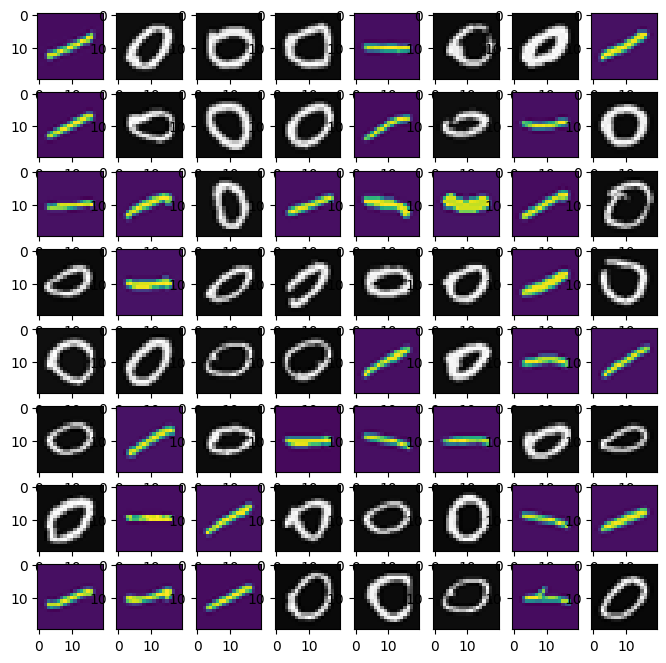

In [74]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,1000)
        if y[r] == 1:
            ax[i][j].imshow(X[r].reshape(20,20))
        else:
            ax[i][j].imshow(X[r].reshape(20,20),cmap = 'gray')

# fig.show()
# want ones look like

In [75]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units = 100,activation = 'sigmoid'),
        Dense(units = 50,activation = 'sigmoid'),
        Dense(units = 10,activation = 'sigmoid'),
        Dense(units = 1,activation = 'sigmoid'),
    ],name = "my_model"
)


In [76]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               40100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 45,671
Trainable params: 45,671
Non-trainable params: 0
_________________________________________________________________


In [77]:
print(model.layers[0].weights[0].shape)
print(model.layers[0].weights[0])


(400, 100)
<tf.Variable 'dense_5/kernel:0' shape=(400, 100) dtype=float32, numpy=
array([[ 0.01978286,  0.07026152, -0.08474863, ..., -0.03280354,
        -0.02744392,  0.10758201],
       [ 0.00202241, -0.09984598,  0.03343997, ..., -0.01627111,
         0.03281122,  0.01259788],
       [ 0.04312622, -0.02370456, -0.10517997, ...,  0.04672652,
        -0.08201664, -0.03946169],
       ...,
       [-0.00923437,  0.04950609, -0.04966773, ..., -0.00546508,
         0.04691317, -0.06051026],
       [-0.03402714,  0.0670164 , -0.08343104, ...,  0.01635603,
         0.0273552 ,  0.03232596],
       [-0.03826869,  0.00066429, -0.0017781 , ...,  0.03185169,
        -0.08561547, -0.07710615]], dtype=float32)>


In [78]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20


32/32 [==============================] - 1s 1000us/step - loss: 0.6293
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4017
Epoch 3/20
32/32 [==============================] - 0s 1000us/step - loss: 0.2388
Epoch 4/20
32/32 [==============================] - 0s 935us/step - loss: 0.1696
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1341
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1117
Epoch 7/20
32/32 [==============================] - 0s 968us/step - loss: 0.0955
Epoch 8/20
32/32 [==============================] - 0s 968us/step - loss: 0.0833
Epoch 9/20
32/32 [==============================] - 0s 968us/step - loss: 0.0740
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0665
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0604
Epoch 12/20
32/32 [==============================] - 0s 935us/step - loss: 0.0552
Epoch 13/20
32/32 [=========================

In [79]:
X.shape
# print(X[0])

(1000, 400)

In [80]:
def pre(num):
    return 1 if num[0][0]>0.5 else 0
print(pre(model.predict(X[0].reshape(1,400))))
print(pre(model.predict(X[500].reshape(1,400))))

1/1 [==============================] - 0s 41ms/step
0
1/1 [==============================] - 0s 14ms/step
1


1/1 [==============================] - 0s 14ms/step


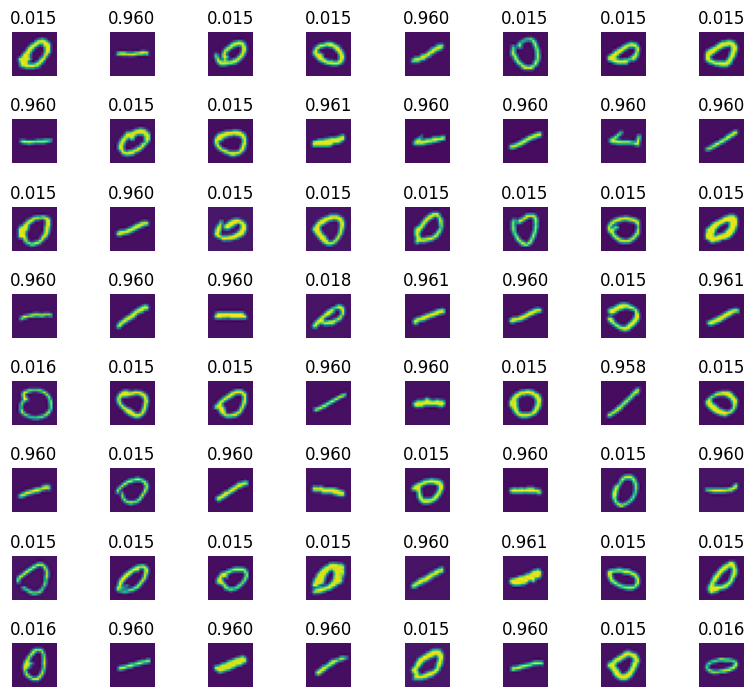

In [81]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92])
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,1000)
        ax[i][j].set_title("%.3f"%(model.predict(X[r].reshape(1,400))[0][0]))
        ax[i][j].imshow(X[r].reshape(20,20))
        ax[i][j].set_axis_off()
        


In [84]:
layer1,layer2,layer3,layer4 = model.layers

per_w1,per_b1 = layer1.weights
per_w2,per_b2 = layer2.weights
per_w3,per_b3 = layer3.weights
per_w4,per_b4 = layer4.weights

In [ ]:
def my_layer(a_in,per_w,per_b):
    return 